In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# read data
df = pd.read_csv("test.csv")
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

In [14]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is FEB5-37D9

 Directory of C:\Users\hlu\Desktop\github\covid-learning\data

09/08/2021  11:08 AM    <DIR>          .
09/08/2021  11:08 AM    <DIR>          ..
07/27/2021  05:36 PM            13,560 districts_info.csv
09/08/2021  11:08 AM    <DIR>          engagement_data
07/27/2021  05:37 PM            44,683 products_info.csv
07/27/2021  05:36 PM             6,117 README.md
               3 File(s)         64,360 bytes
               3 Dir(s)  242,307,751,936 bytes free


In [145]:
districts = pd.read_csv('data/districts_info.csv')
districts.set_index('district_id', inplace=True)

districts.head()

,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
district_id,,,,,,
8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
2685,NaN,NaN,NaN,NaN,NaN,NaN
4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3188,NaN,NaN,NaN,NaN,NaN,NaN
2238,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
products = pd.read_csv('data/products_info.csv')
products.set_index('LP ID', inplace=True)
products.head()

,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
LP ID,,,,,
13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms


In [11]:
districts.groupby(by='state')['state'].count().sort_values()

state
Arizona                  1
North Dakota             1
Florida                  1
Minnesota                1
Texas                    2
Tennessee                2
New Jersey               2
Michigan                 2
New Hampshire            2
District Of Columbia     3
Wisconsin                3
North Carolina           4
Virginia                 4
Missouri                 6
Washington               6
Indiana                  7
New York                 8
Ohio                    11
California              12
Illinois                18
Massachusetts           21
Utah                    29
Connecticut             30
Name: state, dtype: int64

In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 6 columns):
LP ID                         372 non-null int64
URL                           372 non-null object
Product Name                  372 non-null object
Provider/Company Name         371 non-null object
Sector(s)                     352 non-null object
Primary Essential Function    352 non-null object
dtypes: int64(1), object(5)
memory usage: 17.5+ KB


In [21]:
products['Sector(s)'].value_counts()

PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: Sector(s), dtype: int64

In [22]:
products['Primary Essential Function'].value_counts()

LC - Digital Learning Platforms                                              74
LC - Sites, Resources & Reference                                            47
LC - Content Creation & Curation                                             36
LC - Study Tools                                                             25
LC - Courseware & Textbooks                                                  18
LC - Sites, Resources & Reference - Games & Simulations                      18
LC/CM/SDO - Other                                                            16
LC - Sites, Resources & Reference - Digital Collection & Repository          15
CM - Classroom Engagement & Instruction - Classroom Management               11
LC - Sites, Resources & Reference - Streaming Services                        9
CM - Virtual Classroom - Video Conferencing & Screen Sharing                  7
SDO - Data, Analytics & Reporting - Site Hosting & Data Warehousing           6
LC - Study Tools - Q&A                  

In [78]:
# How does student engagement with different types of education technology change over the course of the pandemic?
file  = 'data/engagement_data/8815.csv'
engagement = pd.read_csv(file)
engagement['time'] = pd.to_datetime(engagement['time'])
from datetime import date
engagement['weekday'] = engagement['time'].apply(date.weekday)
engagement.set_index('time', inplace=True)
engagement.head()

,lp_id,pct_access,engagement_index,weekday
time,,,,
2020-01-27,32213,100.00,3000.00,0
2020-02-25,90153,33.33,2666.67,1
2020-02-25,99916,0.00,NaN,1
2020-02-25,28504,0.00,NaN,1
2020-02-25,95731,33.33,333.33,1


In [113]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 134926 entries, 2020-01-27 to 2020-12-31
Data columns (total 4 columns):
lp_id               134926 non-null int64
pct_access          134926 non-null float64
engagement_index    103720 non-null float64
weekday             134926 non-null int64
dtypes: float64(2), int64(2)
memory usage: 10.1 MB


In [117]:
# sort products based on count of days of observations 
lp_count_days = engagement.groupby(by='lp_id')['lp_id'].count().sort_values(ascending=False)

lp_count_days.head()

lp_id
95731    311
32213    311
90153    310
99916    310
28504    310
Name: lp_id, dtype: int64

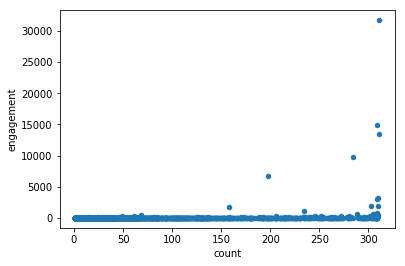

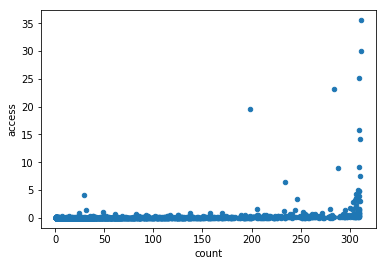

In [159]:
# hypothsis: products with less observations tend to have low engagment_index
# finding: most products have low engagement index
lp_engagement_mean = engagement.groupby(by='lp_id')['engagement_index'].mean()
lp_access_mean = engagement.groupby(by='lp_id')['pct_access'].mean()

temp = pd.DataFrame()
temp['count'] = lp_count_days
temp['engagement'] = lp_engagement_mean
temp['access'] = lp_access_mean
temp.head()
temp.plot.scatter(x='count', y='engagement')
temp.plot.scatter(x='count', y='access')

In [160]:
temp

,count,engagement,access
lp_id,,,
95731,311,31701.653891,30.113601
32213,311,13400.379164,35.548264
90153,310,458.709387,3.087645
99916,310,1968.956926,14.191710
28504,310,3200.932395,7.490419
33185,309,3006.625631,15.805081
57084,309,442.129515,3.871294
34887,309,89.440942,0.332330
16633,309,35.529521,0.470744


In [167]:
# products with high access and their information
high_access_products = temp['access'].sort_values(ascending=False).head(10).index
products.loc[high_access_products]

C:\Users\hlu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
lp_id,,,,,
32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
95731,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
26488,NaN,NaN,NaN,NaN,NaN
98845,https://meet.google.com/_meet,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
61292,http://www.youtube.com,YouTube,Google LLC,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."
33185,http://www.google.com/forms/about/,Google Forms,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Asse...
99916,https://drive.google.com/start,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other
80616,https://www.ixl.com/math/,IXL Math,IXL Learning,PreK-12,LC - Digital Learning Platforms
75206,https://www.ixl.com,IXL,IXL Learning,PreK-12,LC - Digital Learning Platforms


In [168]:
# products with high engagement and their information
# finding: (i) high access products are not necesarily highly engaged 
# (ii) some highly engaged products might not be highly related to learning 
high_engaged_products = temp['engagement'].sort_values(ascending=False).head(20).index
products.loc[high_engaged_products]

C:\Users\hlu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """


,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
lp_id,,,,,
95731,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
26488,NaN,NaN,NaN,NaN,NaN
32213,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
98845,https://meet.google.com/_meet,Meet,Google LLC,PreK-12; Higher Ed; Corporate,CM - Virtual Classroom - Video Conferencing & ...
61292,http://www.youtube.com,YouTube,Google LLC,PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."
28504,http://google.com/sheets/about/,Google Sheets,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other
33185,http://www.google.com/forms/about/,Google Forms,Google LLC,PreK-12; Higher Ed; Corporate,CM - Classroom Engagement & Instruction - Asse...
99916,https://drive.google.com/start,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other
24711,https://kahoot.it,Kahoot!,Kahoot! AS,PreK-12; Higher Ed; Corporate,LC - Study Tools


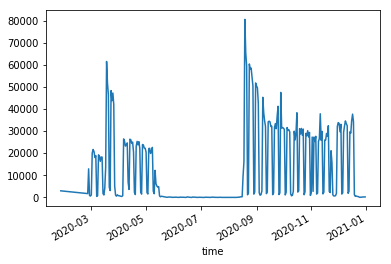

,weekday,engagement_index
time,,
2020-01-27,0,3000.00
2020-02-26,2,1750.00
2020-02-27,3,12947.27
2020-02-28,4,892.04
2020-02-29,5,643.35
2020-03-01,6,1121.12
2020-03-02,0,20096.50
2020-03-03,1,21718.99
2020-03-04,2,20748.48


In [170]:
lp_id = 32213
engagement[engagement['lp_id'] == lp_id]['engagement_index'].plot()
plt.show()

from datetime import date
engagement[engagement['lp_id'] == lp_id][['weekday','engagement_index']]

# findings: (i) significant drop on online learning tool usage during weekends, holidays summer

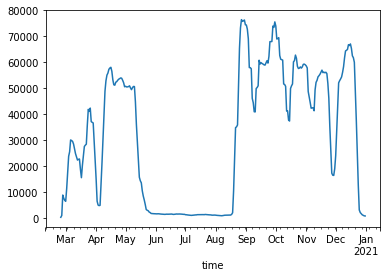

In [155]:
lp_id = 95731
engagement[engagement['lp_id'] == lp_id]['engagement_index'].rolling(7, min_periods=1).mean().plot()

In [156]:
subset = engagement.loc['2020-03-15': '2020-04-15']
subset[subset['lp_id'] == lp_id]

,lp_id,pct_access,engagement_index,weekday
time,,,,
2020-03-15,95731,12.82,3401.64,6
2020-03-16,95731,20.22,5933.04,0
2020-03-17,95731,33.85,10962.24,1
2020-03-18,95731,68.57,62403.74,2
2020-03-19,95731,69.16,55024.78,3
2020-03-20,95731,66.66,51516.10,4
2020-03-21,95731,24.41,7432.49,5
2020-03-22,95731,19.10,6118.45,6
2020-03-23,95731,66.01,56764.24,0
